In [ ]:
# TITANIC SURVIVAL ANALYSIS
# This project implements a Machine Learning–based classification system to predict passenger survival on the Titanic. 
# It involves data preprocessing, feature engineering, and training multiple classification models using the Titanic dataset.

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Matplotlib is building the font cache; this may take a moment.


In [4]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 712
Testing samples: 179


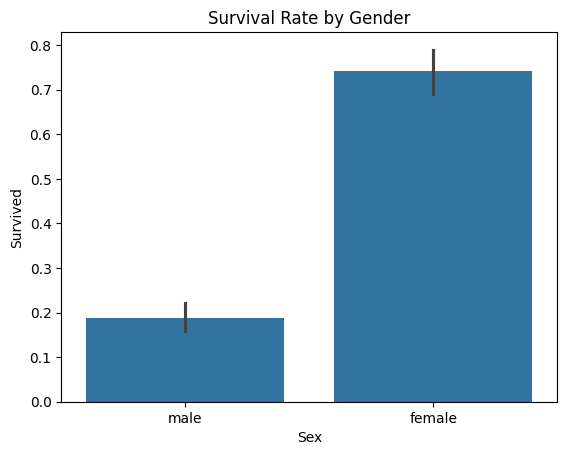

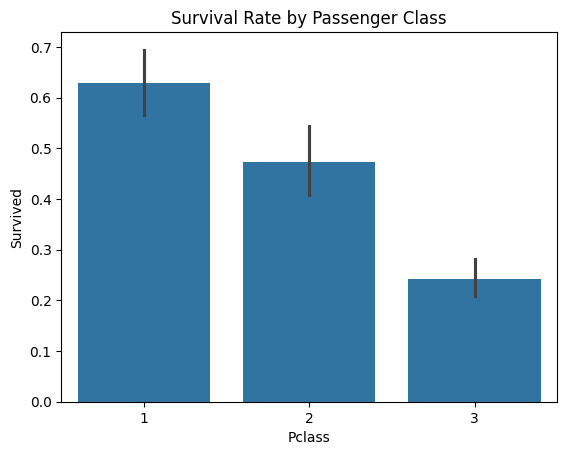

In [14]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

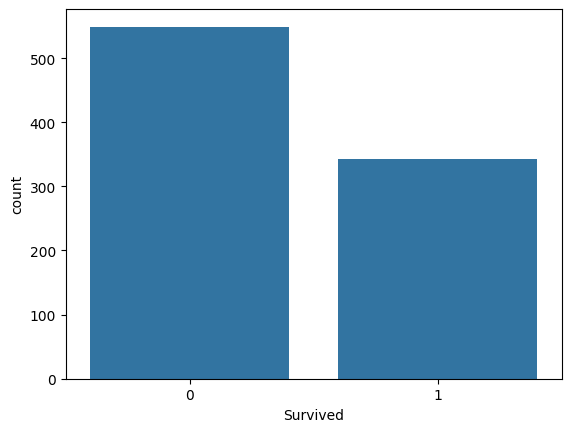

In [7]:
sns.countplot(x='Survived', data=df)
plt.show()

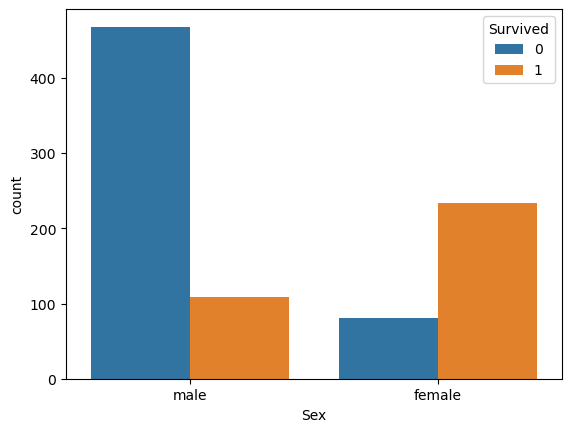

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

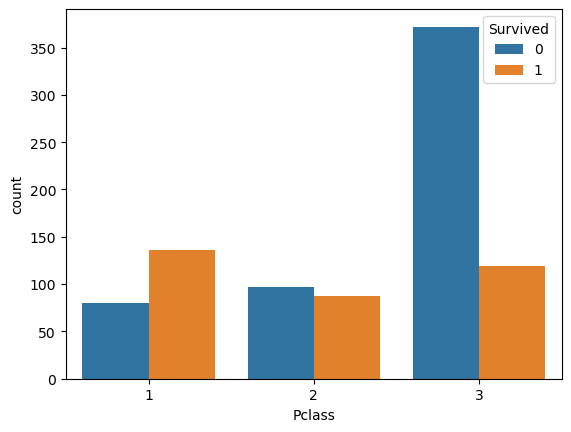

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()


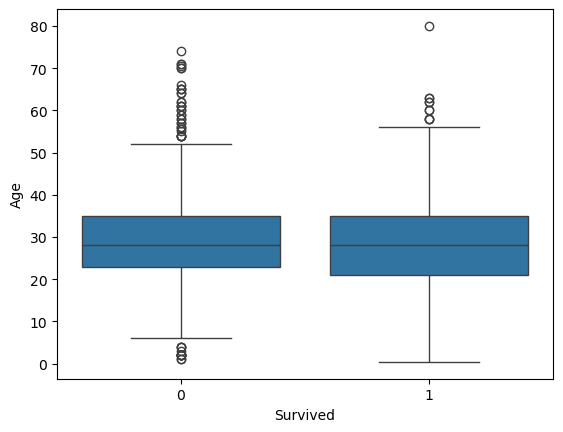

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()


In [ ]:
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
categorical_features = ['Sex','Embarked']
numerical_features = ['Age','Fare','Pclass','SibSp','Parch']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [ ]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_p, y_train)
y_pred_lr = lr.predict(X_test_p)
accuracy_score(y_test, y_pred_lr)


0.8044692737430168

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, random_state=42)
dt.fit(X_train_p, y_train)
y_pred_dt = dt.predict(X_test_p)
accuracy_score(y_test, y_pred_dt)

0.7877094972067039

In [ ]:

rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train_p, y_train)
y_pred_rf = rf.predict(X_test_p)
accuracy_score(y_test, y_pred_rf)

0.8044692737430168

In [ ]:
#Survival by Passenger Class (Count)
class_survival = pd.crosstab(df['Pclass'], df['Survived'])
class_survival

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


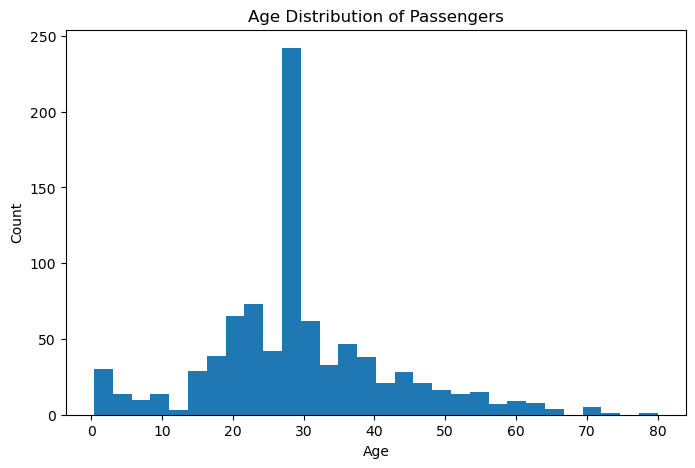

In [ ]:
#Age Distribution (Histogram)
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=30)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

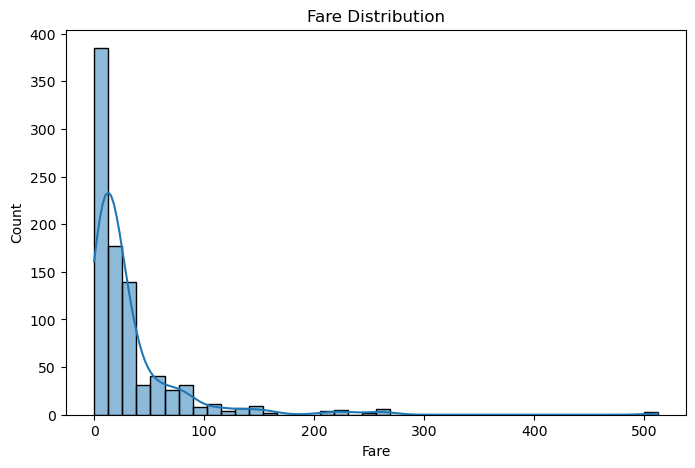

In [ ]:
#Cell 28 – Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

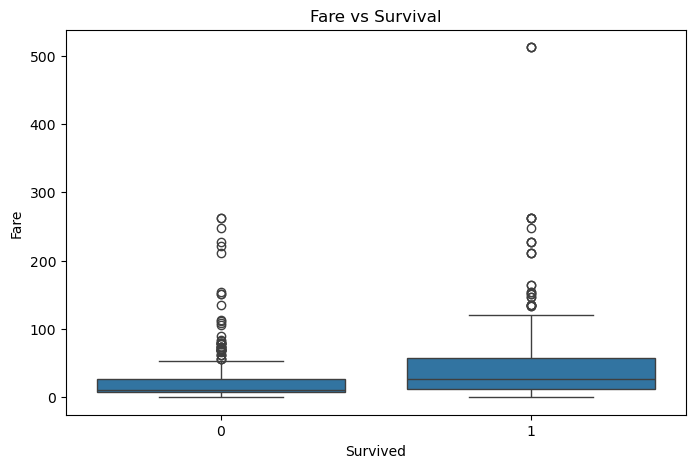

In [ ]:
#Cell 29 – Fare vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

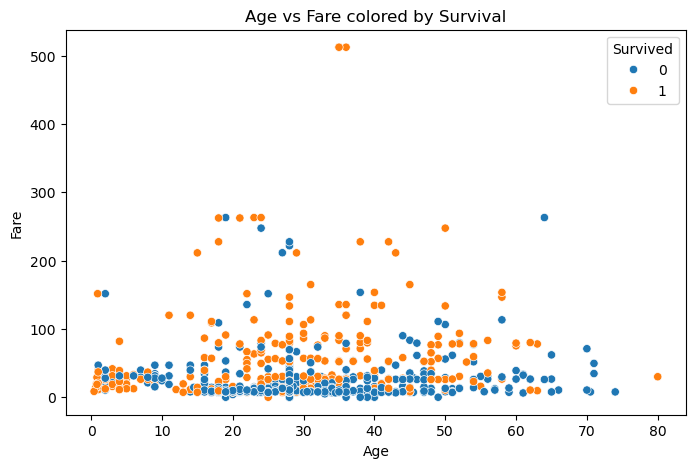

In [ ]:
#Age vs Fare (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    data=df
)
plt.title("Age vs Fare colored by Survival")
plt.show()

In [ ]:
#Survival Count Table
survival_table = df['Survived'].value_counts().reset_index()
survival_table.columns = ['Survived', 'Count']
survival_table

,Survived,Count
0,0,549
1,1,342


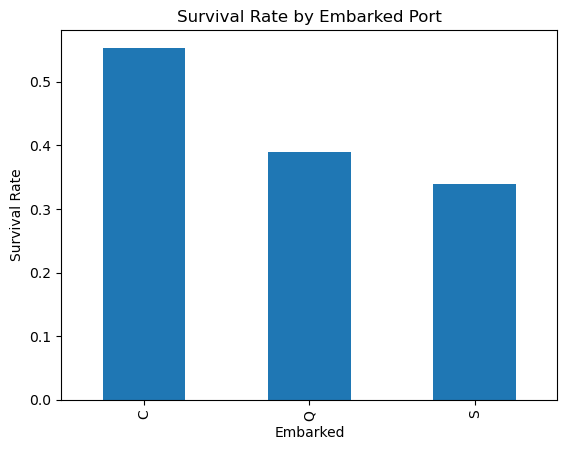

In [ ]:
#Survival Rate by Embarkation Port
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()

survival_by_embarked.plot(kind='bar')
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
#Survival Percentage Table
survival_percent = df['Survived'].value_counts(normalize=True) * 100
survival_percent = survival_percent.reset_index()
survival_percent.columns = ['Survived', 'Percentage']
survival_percent

,Survived,Percentage
0,0,61.616162
1,1,38.383838


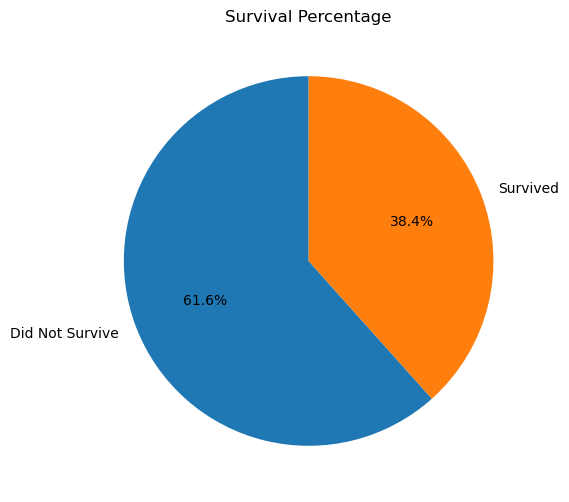

In [ ]:
#Survival Percentage Pie Chart
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    survived_counts,
    labels=['Did Not Survive', 'Survived'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Survival Percentage")
plt.show()